In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dirImagens(pDirImagem):
    try:
        if (not os.path.isdir(pDirImagem)):
            os.mkdir(pDirImagem)
    except OSError as e:
        print(e.args[1])
    
def abriPlanilha():
    diretorio='./data/'
    for arquivo in os.listdir(diretorio):
        if (re.findall('csv', arquivo)):
            return (diretorio+arquivo)
    
dirImagens('Imagens')
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
colunas=['col1','col2','col3','situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','incluiOutro','perfil','observacao','perfis']

ins.columns=colunas

In [4]:
def columnsDrop():
    ins.drop('situacao', axis=1, inplace=True)
    ins.dropna(axis=1, how='all', inplace=True)
    ins.dropna(axis=0, how='all', inplace=True)

columnsDrop()

In [5]:
def columnsInsert():
    ins.insert(3, 'cpfAjustado', '')
    ins.insert(4, 'cpfValidado', '')
    ins.insert(5, 'cpfUF', '')
    ins.insert(7, 'idade', 0)
    ins.insert(8, 'dataNascAjustada', ' ')
    ins.insert(10, 'generoId', 99)
    ins.insert(12, 'escolaridadeId', 0)
    ins.insert(13, 'escolaridade2', ' ')
    ins.insert(15, 'instituicaoId', 0)
    ins.insert(16, 'instituicaoAjustada', '')
    ins.insert(18, 'telefoneAjustado', '')
    ins.insert(20, 'emailValidado', '')
    ins.insert(22, 'cepAjustado', '')
    ins.insert(25, 'cidadeId', 0)
    ins.insert(29, 'tamanhoCamisetaId', 0)

columnsInsert()

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 91
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nroInscricao         92 non-null     object
 1   nome                 92 non-null     object
 2   cpf                  57 non-null     object
 3   cpfAjustado          92 non-null     object
 4   cpfValidado          92 non-null     object
 5   cpfUF                92 non-null     object
 6   dataNascimento       57 non-null     object
 7   idade                92 non-null     int64 
 8   dataNascAjustada     92 non-null     object
 9   genero               92 non-null     object
 10  generoId             92 non-null     int64 
 11  escolaridade         92 non-null     object
 12  escolaridadeId       92 non-null     int64 
 13  escolaridade2        92 non-null     object
 14  instituicao          76 non-null     object
 15  instituicaoId        92 non-null     int64 
 16  instituicaoAjus

In [7]:
ins.head()

,nroInscricao,nome,cpf,cpfAjustado,cpfValidado,cpfUF,dataNascimento,idade,dataNascAjustada,genero,...,emailValidado,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,,,,12/09/2003,0,,Feminino,...,,08121-620,,Jd Nélia,São Paulo,0,N,Desenvolvedor,Tamanho de Camiseta: M,0
1,2,Guilherme Antunes de Campos,50069148821,,,,03/06/2004,0,,Masculino,...,,7091000,,Vila Progresso,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: G,0
2,3,Wezilyana Melice Farias de Lima,1264343442,,,,13/08/1983,0,,Feminino,...,,1529001,,Aclimação,São Paulo,0,N,Analista de Negócios,Tamanho de Camiseta: M,0
3,4,Jéssica Bueno Ramos,51713271818,,,,11/01/2005,0,,Feminino,...,,7141420,,Jardim Santa Emília,Guarulhos,0,N,Universitário,Tamanho de Camiseta: M,0
4,5,Gabriel Vinícius Rocha Barboza,46993988801,,,,17/01/2005,0,,Masculino,...,,07135-720,,Vila Sítio dos Morros,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: G,0


In [8]:
def cpfAjustado(cpf) -> str:
    if (pd.isnull(cpf)):
        return "Não informado!"
    
    pattern='([0-9]{3})([.])([0-9]{3})([.])([0-9]{3})([-])([0-9]{2})'
    if (re.search(pattern, cpf)):
        return cpf
    
    cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)
        
    pattern='([0-9]{3})([0-9]{3})([0-9]{3})([0-9]{2})'
    cpf=re.search(pattern, cpf)
    cpf='{}.{}.{}-{}'.format(cpf.group(1)
                            ,cpf.group(2)
                            ,cpf.group(3)
                            ,cpf.group(4)
                            )
    return cpf

def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    if (pd.isnull(pDataNascimento)):
        if (éIdade):
            return 0
        else:
            return "Não informada!"
    
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return 0
            
        else:
            return 0
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    genero=genero.upper(); genero=str.strip(genero)
    if (genero=='FEMININO'):
        return 1
    elif (genero=='MASCULINO'):
        return 2
    elif (re.search('N[AÃ]O BIN[AÁ]RIO', genero)):
        return 3
    elif (re.search('PREFIRO N[AÃ]O INFORMAR', genero)):
        return 4
    else:
        return 99
    
def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    valor=0
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        re.findall('EM', escolaridade)
       ):
        valor=10
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade)
         ):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    texto='N/D'
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        re.findall('EM', escolaridade)
       ):
        texto='ENS.MÉDIO'
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def telefoneAjustado(fone) -> str:
    #print('Telefone: {}'.format(fone))
    if (pd.isnull(fone)):
        #print('Não informado!'); print('----------------')
        return 'Não informado!'
    else:
        fone=str.strip(fone)
    
    pattern='([\(])([0-9]{2})([\)])([\ ])([0-9]{5})([-])([0-9]{4})'
    if (re.search(pattern, fone)):
        #print('foneCond.1: '+fone); print('----------------')
        return fone

    for char in ([' ','-','\(','\)']):
        fone=re.sub(char,'',fone)
    
    pattern='([0-9]{2})([0-9]{5})([0-9]{4})'
    if (re.search(pattern, fone) and (not re.search('^55', fone))): 
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(fone.group(1)
                                 ,fone.group(2)
                                 ,fone.group(3)
                                )
        #print('foneCond.2: '+fone); print('----------------')
    elif (re.search('^55',fone)):
        pattern = '([0-9]{2})([0-9]{2})([0-9]{5})([0-9]{4})'
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(
                                fone.group(2)
                                ,fone.group(3)
                                ,fone.group(4)
                                )
        #print('foneCond.3: '+fone); print('----------------')
    else:
        #print('Inválido'); print('----------------')
        fone='Inválido'

    return fone

def validarEmail(email):
    # https://www.geeksforgeeks.org/check-if-email-address-valid-or-not-in-python/
    email=str.strip(email)
    pattern='(^[a-zA-Z0-9_.-]{4,40})(@){1}([a-zA-Z0-9-]+)(\.){1}([a-zA-Z0-9-.]+$)'
    #print(pattern, email)
    email=re.search(pattern, email)
    #print(email)
    if (not email):
        return [False, 'Formação do E-Mail incorreta!']
    #print(email.group(2), email.start(), email.end()) ## @
    return [True, str.lower(email.group(0))]

def quantInstituicao(pInstituicao) -> int:
    tp=type(pInstituicao)
    if (tp==str):
        pInst=pInstituicao.upper(); pInst=str.strip(pInst)
        
        if (re.findall('BELAS ARTES', pInst)):
            return 1
        elif (re.findall('FATEC', pInst)):
            return 2
        elif (re.findall('WYDEN', pInst)):
            return 3
        elif (re.findall('JUDAS', pInst)):
            return 4
        elif (re.findall('IFSP', pInst) or re.findall('INSTITUTO FEDERAL', pInst)):
            return 5
        elif (re.findall('ENIAC', pInst)):
            return 6
        elif (re.findall('FIAP', pInst)):
            return 7
        elif (re.findall('FAM', pInst)):
            return 8
        elif (re.findall('UNICAMP', pInst)):
            return 9
        elif (re.findall('ETEC', pInst)):
            return 10
        elif (re.findall('LICEU', pInst)):
            return 11
        elif (re.findall('MOACYR CAMPOS', pInst)):
            return 12
        elif (re.findall('USP', pInst) or re.findall('UNIVERSIDADE DE S[AÃ]O PAULO', pInst)):
            return 13
        elif (re.findall('DRUMMOND', pInst)):
            return 14
        elif (re.findall('IMPACTA', pInst)):
            return 15
        elif (re.findall('VUNESP', pInst)):
            return 16
        elif (re.findall('SAL[EÉ]M', pInst)):
            return 17
        elif (re.findall('TORRICELLI', pInst)):
            return 18
        else:
            return 99
      
    elif (tp==float):
        return 0

    return 99

def instituicaoAjustada(pInst) -> str:
    if (pd.isnull(pInst)):
        return 'Não Informada!'
    else:
        pInst=pInst.upper(); pInst=str.strip(pInst)

    if (re.findall('ENIAC',pInst)):
        inst='ENIAC'
    elif (re.findall('INSTITUTO FEDERAL',pInst) or 
          re.findall('IF',pInst)
         ):
        inst='IFSP'
    elif (re.findall('USP',pInst) or 
         re.findall('UNIVERSIDADE DE S[AÃ]O PAULO',pInst)):
        inst='USP'
    elif (re.findall('BELAS ARTES', pInst)):
        inst='BELAS ARTES'
    elif (re.findall('FATEC', pInst)):
        inst='FATEC'
    elif (re.findall('WYDEN', pInst)):
        inst='WYDEN'
    elif (re.findall('JUDAS', pInst)):
        inst='UNIV.SÃO JUDAS'
    elif (re.findall('FIAP', pInst)):
        inst='FIAP'
    elif (re.findall('UNICAMP', pInst) or
         re.findall('CAMPINAS', pInst)):
        inst='UNICAMP'
    elif (re.findall('ETEC', pInst)):
        inst='ETEC'
    elif (re.findall('LICEU', pInst)):
        inst='LICEU'
    elif (re.findall('MOACYR CAMPOS', pInst)):
        inst='MOACYR CAMPOS'
    elif (re.findall('UNINOVE', pInst)):
        inst='UNINOVE'
    elif (re.findall('FAM', pInst)):
        inst='FAM'
    elif (re.findall('DRUMMOND', pInst)):
        inst='DRUMMOND'
    elif (re.findall('IMPACTA', pInst)):
        inst='IMPACTA'
    elif (re.findall('TORRICELLI', pInst)):
        inst='TORRICELLI'
    elif (re.findall('ITB', pInst)):
        inst='ITB'
    elif (re.findall('UNESP', pInst)):
        inst='UNESP'
    elif (re.findall('CRUZEIRO DO SUL', pInst)):
        inst='CRUZEIRO DO SUL'
    elif (re.findall('ANHANGUERA', pInst)):
        inst='ANHANGUERA'
    elif (re.findall('VIRTUAL', pInst)):
        inst='UNIVESP'
    elif (re.findall('SAL[EÉ]M', pInst)):
        inst='JOÃO C.SALÉM'
    elif (re.findall('BROTERO', pInst)):
        inst='FREDERICO B.BROTERO'
        
    else:
        inst='Outros'
    
    return inst

def cepAjustado(cep) -> str:
    cep=str.strip(cep)
    pattern='([0-9]{5})([-]{1})([0-9]{3})'
    if (not re.search(pattern, cep)):
        cep=re.sub('-','', cep)
        cep=cep.zfill(8)
        pattern='([0-9]{5})([0-9]{3})'
        cep=re.search(pattern, cep)
        cep='{}-{}'.format(cep.group(1),cep.group(2))
    return cep

def cidadeMaiuscula(cidade) -> str:
    return str.upper(str.strip(cidade))

def quantCidade(cidade) -> int:
    cidade=cidade.upper(); cidade=str.strip(cidade)
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    elif re.findall('ITAPEVI', cidade):
        return 9
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    


In [9]:
ins['cpfAjustado']=ins['cpf'].apply(lambda cpf: cpfAjustado(cpf))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: quantInstituicao(instituicao))
ins['instituicaoAjustada']=ins['instituicao'].apply(lambda instituicao : instituicaoAjustada(instituicao))
ins['telefoneAjustado']=ins['telefone'].apply(lambda fone: telefoneAjustado(fone))
ins['emailValidado']=ins['email'].apply(lambda email : validarEmail(email)[1])
ins['cepAjustado']=ins['cep'].apply(lambda cep : cepAjustado(cep))
ins['cidade']=ins['cidade'].apply(lambda cidade : cidadeMaiuscula(cidade))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['observacao'].apply(lambda obs: quantTamanhoCamiseta(obs))

In [10]:
class validaDocs:
    def __init__(self):
        self.__uf=[
                    ['DF','GO','MS','MT','TO'],
                    ['AC','AM','AP','PA','RO','RR'],
                    ['CE','MA','PI'],
                    ['AL','PB','PE','RN'],
                    ['BA','SE'],
                    ['MG'],
                    ['ES','RJ'],
                    ['SP'],
                    ['PR','SC'],
                    ['RS']
                  ]
        self.uf = None
        self.__dg1 = 0
        self.__dg2 = 0
    
    def CPF(self, cpf) -> list:
        if (pd.isnull(cpf)):
            return ('CPF não informado!', False, None)
        else:
            cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)

        pattern='[0-9]{3}[0-9]{3}[0-9]{3}[0-9]{2}'
        #pattern='[0-9]{3}\.[0-9]{3}\.[0-9]{3}\-[0-9]{2}'
        if (not re.search(pattern, cpf)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, value in enumerate(range(10,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg1=(11-(soma%11))
        if (self.__dg1>=10):
            self.__dg1=0
            
        # Segundo dígito...
        soma=0
        for p, value in enumerate(range(11,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg2=(11-(soma%11))
        if (self.__dg2>=10):
            self.__dg2=0
       
        ## Dígito 1 e 2...
        #print('Dígito 1: {}, dígito 2: {}'.format(self.__dg1, self.__dg2))
        if (
            (self.__dg1!=int(cpf[9])) or
            (self.__dg2!=int(cpf[10]))
           ):
            return ('Dígito(s) inválido(s)!', False, None)
        else:
            rCPF=cpf[0:3]+'.'+cpf[3:6]+'.'+cpf[6:9]+'-'+cpf[9:]
        
        ## Atribui a lista de UFs.
        self.uf = self.__uf[int(cpf[8])-1]
        
        return (rCPF, True, self.uf)
    
    def CNPJ(self, cnpj) -> list:
        if (pd.isnull(cnpj)):
            return ('CNPJ não informado!', False, None)
        else:
            cnpj=re.sub('[\.\-\/\\\]','',cnpj);  cnpj.zfill(14)
        
        pattern='[0-9]{2}[0-9]{3}[0-9]{3}[0-9]{4}[0-9]{2}'
        if (not re.search(pattern, cnpj) or (len(cnpj)!=14)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, valor in enumerate(range(5,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+4])
            soma+=(int(cnpj[p+4])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg1=0
        else:
            self.__dg1=(11-resto)
        
        # Segundo dígito...
        soma=0
        for p, valor in enumerate(range(6,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+5])
            soma+=(int(cnpj[p+5])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg2=0
        else:
            self.__dg2=(11-resto)
        
        #print(self.__dg1, self.__dg2)
        if (
            (self.__dg1!=int(cnpj[12])) or
            (self.__dg2!=int(cnpj[13]))
            ):
            return ('Dígito(s) verificador(es) inválido(s)', False, None)
        else:
            rCNPJ=cnpj[0:2]+'.'+cnpj[2:5]+'.'+cnpj[5:8]+'/'+cnpj[8:12]+'-'+cnpj[12:]

        return (rCNPJ, True, None)


In [11]:
validarCPF=validaDocs()
ins['cpfValidado']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[0])
ins['cpfUF']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[2])

In [12]:
#https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=15, vmax=70, cmap="OrRd", subset=['idade'])
    styler.background_gradient(axis=None, vmin=1, vmax=10, cmap='Dark2', subset=['generoId'])
    styler.background_gradient(axis=None, vmin=10, vmax=55, cmap='Pastel1', subset=['escolaridadeId'])
    return styler

In [13]:
ins.style.pipe(make_pretty) 
#ins[['nome','cpf','dataNascimento','idade','telefone','telefoneAjustado']]

,nroInscricao,nome,cpf,cpfAjustado,cpfValidado,cpfUF,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,telefone,telefoneAjustado,email,emailValidado,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,514.542.178-80,514.542.178-80,['SP'],12/09/2003,20,12/09/2003 00:00:00,Feminino,1,Ensino Superior,25,ENS.SUPERIOR COMPLETO,Belas Artes,1,BELAS ARTES,11954852961,(11) 95485-2961,isabellevictoria.urs@gmail.com,isabellevictoria.urs@gmail.com,08121-620,08121-620,Jd Nélia,SÃO PAULO,2,N,Desenvolvedor,Tamanho de Camiseta: M,2
1,2,Guilherme Antunes de Campos,50069148821,500.691.488-21,500.691.488-21,['SP'],03/06/2004,19,03/06/2004 00:00:00,Masculino,2,Ensino Superior Cursando,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Fatec Guarulhos,2,FATEC,11959762456,(11) 95976-2456,guiancam@gmail.com,guiancam@gmail.com,7091000,07091-000,Vila Progresso,GUARULHOS,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
2,3,Wezilyana Melice Farias de Lima,1264343442,012.643.434-42,012.643.434-42,"['AL', 'PB', 'PE', 'RN']",13/08/1983,40,13/08/1983 00:00:00,Feminino,1,Pós-graduação completo,35,PÓS-GRADUAÇÃO COMPLETO,Wyden,3,WYDEN,11992471992,(11) 99247-1992,lilyfarias@gmail.com,lilyfarias@gmail.com,1529001,01529-001,Aclimação,SÃO PAULO,2,N,Analista de Negócios,Tamanho de Camiseta: M,2
3,4,Jéssica Bueno Ramos,51713271818,517.132.718-18,517.132.718-18,['SP'],11/01/2005,19,11/01/2005 00:00:00,Feminino,1,Ensino Superior Cursando,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,"Instituto Federal de Educação, Ciência e Tecnologia de São Paulo",5,IFSP,11963095666,(11) 96309-5666,jessicabuenoramos5@gmail.com,jessicabuenoramos5@gmail.com,7141420,07141-420,Jardim Santa Emília,GUARULHOS,1,N,Universitário,Tamanho de Camiseta: M,2
4,5,Gabriel Vinícius Rocha Barboza,46993988801,469.939.888-01,469.939.888-01,['SP'],17/01/2005,19,17/01/2005 00:00:00,Masculino,2,Cursando Ensino Superior em Análise e desenvolvimento de sistemas,10,ENS.MÉDIO INCOMPLETO/CURSANDO,"Instituto Federal de Ciência, Tecnologia e Educação de São Paulo",5,IFSP,(11) 94585-0708,(11) 94585-0708,gabrielrochabarboza@gmail.com,gabrielrochabarboza@gmail.com,07135-720,07135-720,Vila Sítio dos Morros,GUARULHOS,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
5,6,Richard Klaoss Neumann,54807928813,548.079.288-13,548.079.288-13,['SP'],30/07/2005,18,30/07/2005 00:00:00,Masculino,2,Ensino médio e técnico completo,15,ENS.MÉDIO COMPLETO,"No momento, nenhuma",99,Outros,11997103862,(11) 99710-3862,richardklaossneumann@gmail.com,richardklaossneumann@gmail.com,7230450,07230-450,Parque Uirapuru,GUARULHOS,1,N,Estudante de programação e concurso,Tamanho de Camiseta: G,3
6,7,Cristofer Batista da Silva,48859050871,488.590.508-71,488.590.508-71,['SP'],14/02/2005,19,14/02/2005 00:00:00,Masculino,2,Ensino Médio Completo,15,ENS.MÉDIO COMPLETO,nan,0,Não Informada!,16996194782,(16) 99619-4782,cristofersilva.rp@gmail.com,cristofersilva.rp@gmail.com,14050220,14050-220,Vila Amélia,RIBEIRÃO PRETO,3,N,Empreendedor e Designer de UX,Tamanho de Camiseta: G,3
7,8,Thiago Henrique Silva,38298390814,382.983.908-14,382.983.908-14,['SP'],22/06/2002,21,22/06/2002 00:00:00,Masculino,2,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade de São Paulo,13,USP,16993599793,(16) 99359-9793,thiago@roihack.com.br,thiago@roihack.com.br,14051-330,14051-330,Sumarezinho,RIBEIRÃO PRETO,3,N,Analista de Negócios,Tamanho de Camiseta: M,2
8,9,Anaíle Silva de Oliveira,23033966896,230.339.668-96,230.339.668-96,['SP'],19/02/2002,22,19/02/2002 00:00:00,Feminino,1,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade São Judas Tadeu,4,UNIV.SÃO JUDAS,11987613499,(11) 98761-3499,autoconhecimento.ana@gmail.com,autoconhecimento.ana@gmail.com,7113090,07113-090,Macedo,GUARULHOS,1,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2
9,10,Leonardo dos Reis Souza,53872905880,538.729.058-80,538.729.

In [14]:
X = ins['escolaridade2']
y = ins['idade']

### Gráficos

In [15]:
def grafico1(X, y):
    plt.figure(figsize=(10,8))
    plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
    plt.scatter(X,y,c='darkblue',marker='o')
    plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
    plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
    plt.xticks(rotation=60)
    plt.show()
    
    
def grafico2(X, y, nomeArquivo):
    plt.figure(figsize=(12,8))
    plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
    plt.bar(X, y, width=1, color='darkblue', edgecolor="white", linewidth=1)
    plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
    plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
    plt.xticks(rotation=60)
    plt.savefig(nomeArquivo, dpi=300)
    plt.show()
    
#grafico2(X, y, './Imagens/fig1.jpg')

In [16]:
# Monta um gráfico de Pizza, com contagem de valores.
def dataPieGraph(dfColuna) -> list: 
    etiquetas=[]; valores=[]
    
    for descricao in dfColuna:
        p=0; localizado=False
        for et in etiquetas:
            if (descricao==et):
                valores[p]+=1
                localizado=True
                break
            else:
                p+=1
        if (not localizado):
            etiquetas.append(descricao)
            valores.append(1)
    
    return [etiquetas, valores]

def dataComputeByRange(faixa, valores) -> list:
    # Array de retorno.
    ret=[]; etiquetas=[]
    for fx in range(len(faixa)):
        ret.append(0)
    #print(ret)

    for etq in faixa:
        if (len(etq)==1):
            if (etq.get('abaixo') is not None):
                etiquetas.append('igual/menor {abaixo}.'.format(abaixo=etq['abaixo']))
            elif (etq.get('acima') is not None):
                etiquetas.append('{acima}+'.format(acima=etq['acima']))
        else:
            etiquetas.append('De {min} à {max}.'.format(min=etq['min'], max=etq['max']))
          
    for valor in valores:
        for posicao, fx in enumerate(faixa):
            if (len(fx)==1):
                if (fx.get('abaixo') is not None):
                    if (valor<=fx['abaixo']):
                        ret[posicao]+=1
                if (fx.get('acima') is not None):
                     if (valor>=fx['acima']):
                        ret[posicao]+=1
            else:
                min=fx['min']; max=fx['max']
                if (valor >= min and valor <= max):
                    ret[posicao]+=1
                    #print('Posição: {}, Valor: {}, Faixa: {}'.format(posicao, valor, fx))
    return [etiquetas, ret]
    
def pieGraph(dataPie, **kargs) -> None:
    etiquetas=dataPie[0]
    valores=dataPie[1]
    
    # **kargs
    titulo='Titulo'; nomeArquivo='./Imagem'+str.zfill(str(np.random.randint(999)),3)
    colormap='viridis'
        
    for chave in kargs:
        if (str.lower(chave)=='titulo'):
            titulo=kargs['titulo']
        if (str.lower(chave)=='nomearquivo'):
            nomeArquivo=kargs[chave]
        if (str.lower(chave)=='colormap'):
            colormap=kargs[chave]
   
    # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    # plotar...
    fig, ax = plt.subplots(figsize=(12,10))
    plt.title(titulo, fontdict={'weight':'bold'})
    ax.pie(valores, 
           colors=colors,
           radius=3, 
           center=(4, 4),
           textprops={'size':12, 'weight':'bold'},
           wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
           frame=True,
           labels=etiquetas,
           autopct='%1.1f%%',
          )

    #ax.legend(labels=etiquetas,
    #          title=titulo,
    #          loc='upper right',
    #          bbox_to_anchor=(.5, 1, 1, 0)
    #         )

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300)
    plt.show()

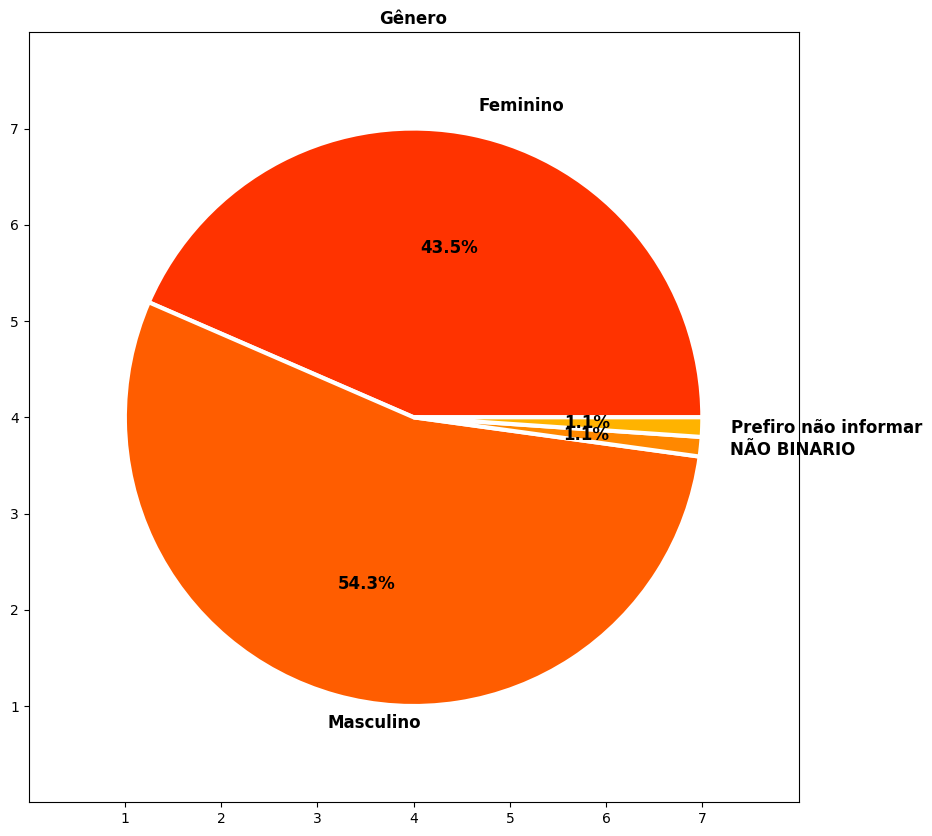

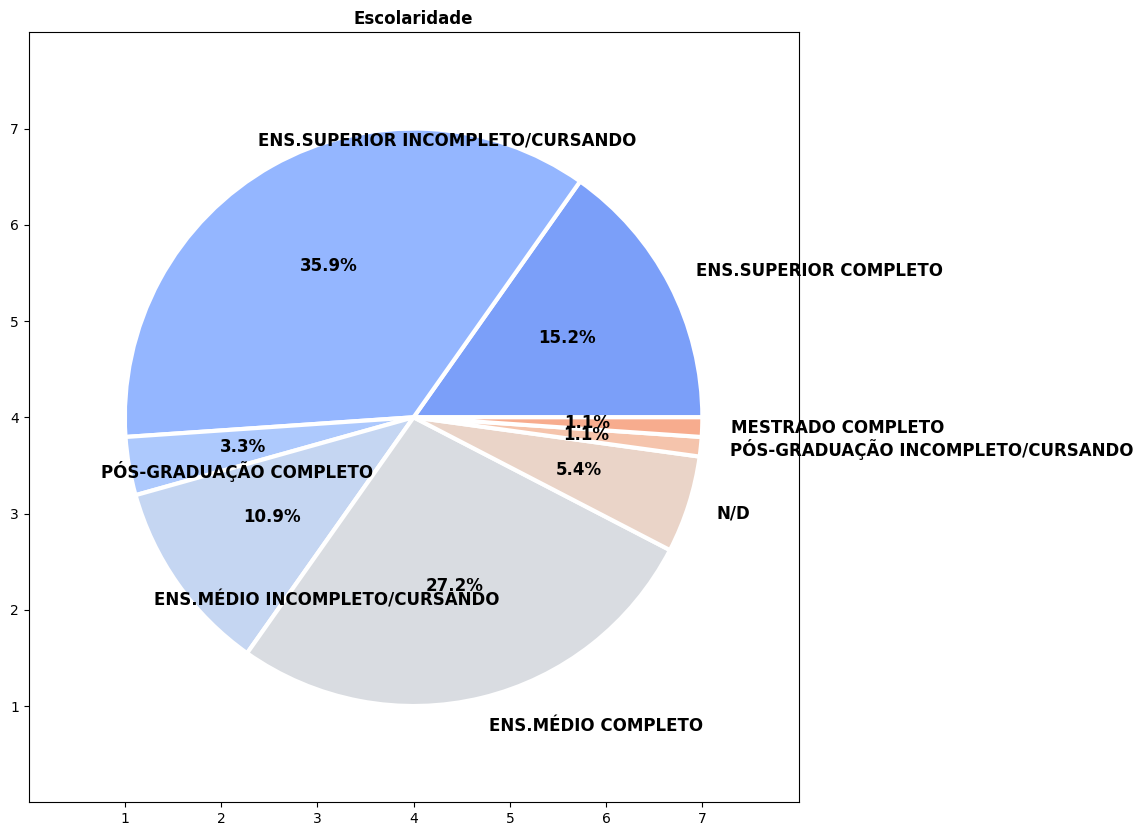

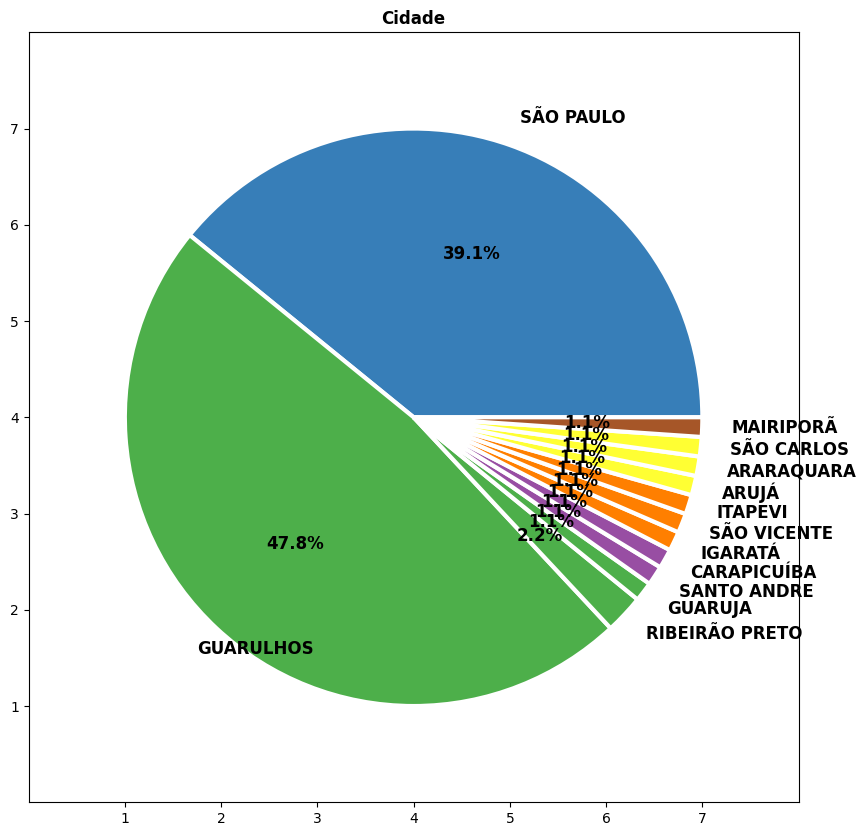

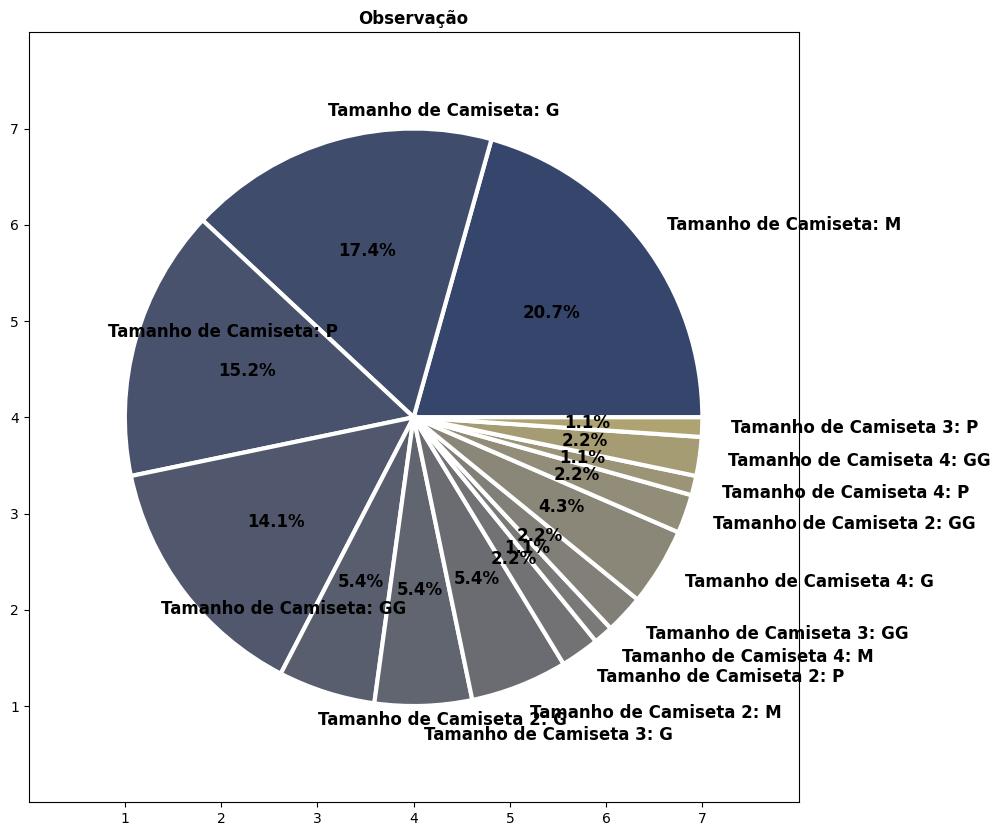

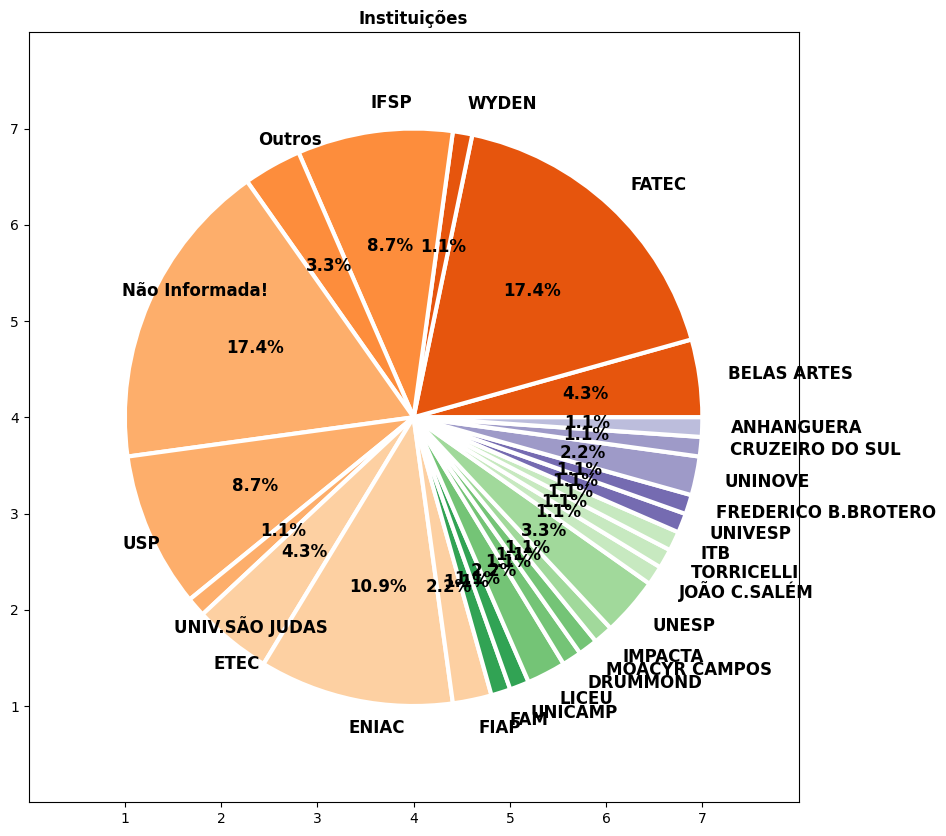

In [17]:
#
pieGraph(dataPieGraph(ins['genero'])
        ,titulo='Gênero'
        ,nomeArquivo='./Imagens/Genero.jpg'
        ,colorMap='autumn'
        )

pieGraph(dataPieGraph(ins['escolaridade2'])
        ,titulo='Escolaridade'
        ,nomeArquivo='./Imagens/Escolaridade.jpg'
        ,colorMap='coolwarm'
        )

pieGraph(dataPieGraph(ins['cidade'])
        ,titulo='Cidade'
        ,nomeArquivo='./Imagens/Cidade.jpg'
        ,colorMap='Set1'
        )

pieGraph(dataPieGraph(ins['observacao'])
        ,titulo='Observação'
        ,nomeArquivo='./Imagens/Observacao.jpg'
        ,colorMap='cividis'
        )

pieGraph(dataPieGraph(ins['instituicaoAjustada'])
        ,titulo='Instituições'
        ,nomeArquivo='./Imagens/Instituicao.jpg'
        ,colorMap='tab20c'
        )

Faixa de dados:
 [['De 15 à 19.', 'De 20 à 29.', 'De 30 à 39.', 'De 40 à 49.', '50+'], [16, 29, 7, 2, 1]]: 


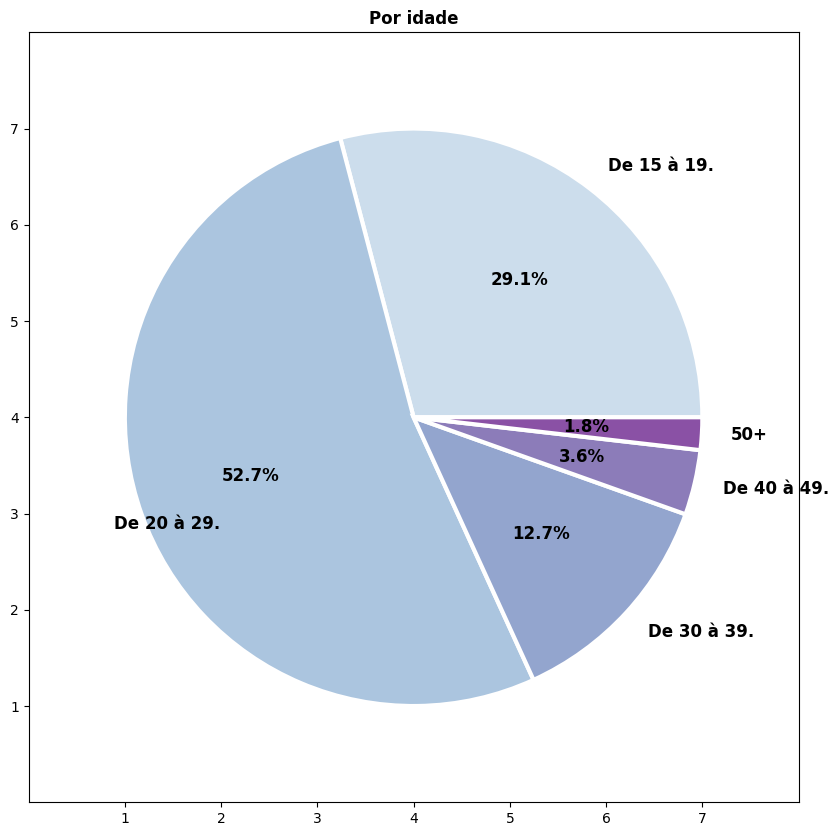

In [18]:
dataPie=dataComputeByRange([ #{'abaixo':0},{'min':1,'max':14},
                           {'min':15,'max':19},{'min':20,'max':29},{'min':30,'max':39},
                           {'min':40,'max':49},{'acima':50}],
                        ins['idade'] 
                   )
print('Faixa de dados:\n {dataPie}: '.format(dataPie=dataPie))

pieGraph(dataPie
        ,titulo='Por idade'
        ,nomeArquivo='./Imagens/PorIdade.jpg'
        ,colorMap='BuPu')

In [19]:
# https://stackoverflow.com/questions/50807744/apply-css-class-to-pandas-dataframe-using-to-html
def geraHTML(dataFrame, arquivoHTML = 'index.html', 
             cssStyle = 'style.css', titulo = 'Html'):
    html_string = '''
        <!DOCTYPE html>
        <html lang='pt-br'>
          <head>
              <title>{titulo}</title>
          </head>
          <link rel="stylesheet" type="text/css" href="{css}"/>
          <body>
                {tabela}
          </body>
        </html>
    '''
    with open(arquivoHTML, 'w') as arquivo:
        arquivo.write(html_string.format(titulo=titulo,
                               tabela=dataFrame.to_html(
                                       index=False,
                                       justify='center',
                                       classes='mystyle'),
                               css=cssStyle
                              ))
    
insHtml=ins[['nroInscricao','nome','cpf','cpfValidado',
             'dataNascimento','dataNascAjustada','idade','genero','generoId',
             'escolaridade','escolaridade2','instituicao','instituicaoAjustada',
             'telefoneAjustado','email','emailValidado',
             'cidade','cepAjustado','observacao']]       
insHtml.columns=[['Nro.Inscricao','Nome','CPF','CPF Validado',
                  'Data Nascimento','Data Nasc.','Idade','Gênero','Id.Gênero',
                  'Escolaridade','Escolar.Ajustado','Instituição','Inst.Ajustada',
                  'Telefone/Cel','e-Mail','e-Mail Validado',
                  'Cidade','CEP','Observação']]  
        
geraHTML(insHtml, 
         './html/Hackathon 2024 - Inscrições.html','../css/df_style.css',
         'Hackathon 2024 - Inscrições')

In [20]:
#### End